In [1]:
import numpy as np
import pandas as pd

In [36]:
class Oja:
   
    # init method or constructor 
    def __init__(self, dfX, epochs, learningRate):
        self.X= self.stand(dfX)
        #self.X = np.array(X)
        self.w = np.random.rand(self.X[0].size)
        self.epochs = epochs
        self.learningRate = learningRate
        
    def stand(self, df):
        toRet= pd.DataFrame()
        for column in df:
            df[column]= (df[column] - df[column].mean())/(df[column].std())
        return df.to_numpy()
   
    # Sample Method 
    def run(self):
        for i in range(self.epochs):
            for x in self.X:
                s= np.dot(x, self.w)
                self.w= self.w + self.learningRate * s * (x - (s * self.w))
    
    def printX(self):
        print(self.X)
        
    def printW(self):
        print(self.w)
        
    def  getW(self):
        return self.w * -1
    
    def getNormW(self):
        return np.sqrt(np.inner(self.w,self.w))

Leo el .csv

In [3]:
df = pd.read_csv (r'../europe.csv')
df.head(5)

,Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,Austria,83871,41600,3.5,79.91,0.80,0.03,4.2
1,Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2
2,Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5


Le saco la columna de países

In [4]:
df1= df.loc[:, df.columns != 'Country']
df1.head(5)

,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
0,83871,41600,3.5,79.91,0.80,0.03,4.2
1,30528,37800,3.5,79.65,1.30,0.06,7.2
2,110879,13800,4.2,73.84,2.60,-0.80,9.6
3,56594,18000,2.3,75.99,2.39,-0.09,17.7
4,78867,27100,1.9,77.38,1.15,-0.13,8.5


In [35]:
epochs= 2000
learningRate= 0.0001

In [37]:
o= Oja(df1, epochs, learningRate)

o.run()
#o.stand(df1)

C:\Users\matia\AppData\Local\Temp\ipykernel_16096\147647417.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]= (df[column] - df[column].mean())/(df[column].std())


In [32]:
o.printW()

[-0.1255638   0.50044532 -0.40719719  0.48301544 -0.18753578  0.47555764
 -0.27132011]


In [18]:
o.printW()

[-0.13183004  0.49986113 -0.41333255  0.48431745 -0.18236893  0.47420723
 -0.26825974]


In [29]:

print(o.getW(), o.getW() * -1)
o.getNormW()


[-0.13183004  0.49986113 -0.41333255  0.48431745 -0.18236893  0.47420723
 -0.26825974] [ 0.13183004 -0.49986113  0.41333255 -0.48431745  0.18236893 -0.47420723
  0.26825974]


1.0013699192495278

In [38]:
loadings = o.getW()
loadings_df = pd.DataFrame.from_dict(loadings)
loadings_df['variable'] = df1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,0
variable,
Area,0.125539
GDP,-0.500447
Inflation,0.407192
Life.expect,-0.483023
Military,0.187529
Pop.growth,-0.475563
Unemployment,0.271318


['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']
[0.12553871778949555, -0.5004474857352494, 0.40719168281334883, -0.4830227651446253, 0.18752899749497057, -0.4755629860900134, 0.27131827167525796]


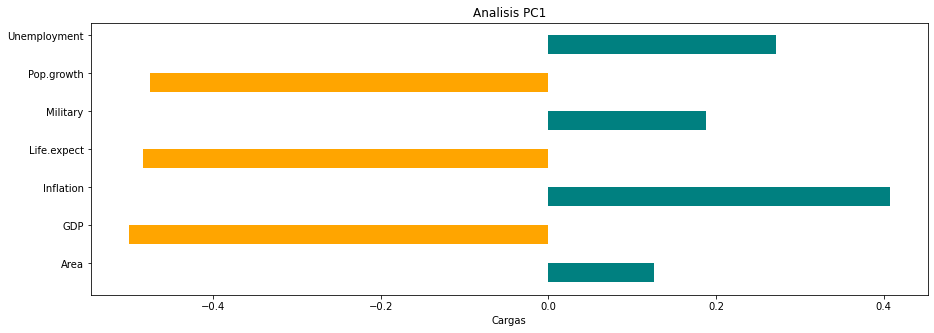

In [39]:
import matplotlib.pyplot as plt

a = loadings_df[0]

x = list(a.index)
y = list(a)
print(x)
print(y)

fig, ax = plt.subplots(figsize=(15,5))  
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups

cc=['colors']*len(y)
for n,val in enumerate(y):
    if val<0:
        cc[n]='orange'
    elif val>=0:
        cc[n]='teal'

#ax.barh(ind, y, width, color="blue")
ax.barh(ind, y, width, color=cc)

ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)


plt.title('Analisis PC1')
plt.xlabel('Cargas')
plt.show()